In [30]:
# import requires library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import warnings
warnings.filterwarnings('ignore')

In [31]:
# load datasets
df=pd.read_csv('review_comments.csv',encoding='utf=8')

In [32]:
df

,Unnamed: 0,review_title,review_comments,rating
0,0,Very Good,Thanks again Flipkart team the wonderful deliv...,4
1,1,Terrific,Very nice mobile and battry is very extra powa...,5
2,2,Terrific purchase,Camera 4/5 if u able to set it properly\nBatte...,5
3,3,Good choice,Positive sides :\n1. Battery is very very powe...,4
4,4,Fantastic,Excellent!!\nVery good mobile. I ordered it to...,5
...,...,...,...,...
35536,5663,More Range - More connected devices,This router is literally a striped down versio...,5.0 out of 5 stars
35537,5664,Faulty Product,Product is ok. Brought the costlier one thinki...,1.0 out of 5 stars
35538,5665,Does what a basic router should do but for hig...,This Review is in depth after a full year of u...,5.0 out of 5 stars
35539,5666,Mostly router decreases speed from 50Mbps to 5...,"I purchased this for my office use. Hence, you...",1.0 out of 5 stars


In [33]:
# drop unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35541 entries, 0 to 35540
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_title     35524 non-null  object
 1   review_comments  35470 non-null  object
 2   rating           35524 non-null  object
dtypes: object(3)
memory usage: 833.1+ KB


- Features Information
    - review titel --> title of review
    - review comments --> text of review 
    - rating --> No.of rating b/t 1 to 5

In [35]:
# check null values
df.isnull().sum()

review_title       17
review_comments    71
rating             17
dtype: int64

In [36]:
# drop null valuse
df.dropna(axis=0,how='any',inplace=True)

In [37]:
# clean dataset
df

,review_title,review_comments,rating
0,Very Good,Thanks again Flipkart team the wonderful deliv...,4
1,Terrific,Very nice mobile and battry is very extra powa...,5
2,Terrific purchase,Camera 4/5 if u able to set it properly\nBatte...,5
3,Good choice,Positive sides :\n1. Battery is very very powe...,4
4,Fantastic,Excellent!!\nVery good mobile. I ordered it to...,5
...,...,...,...
35536,More Range - More connected devices,This router is literally a striped down versio...,5.0 out of 5 stars
35537,Faulty Product,Product is ok. Brought the costlier one thinki...,1.0 out of 5 stars
35538,Does what a basic router should do but for hig...,This Review is in depth after a full year of u...,5.0 out of 5 stars
35539,Mostly router decreases speed from 50Mbps to 5...,"I purchased this for my office use. Hence, you...",1.0 out of 5 stars


In [38]:
# merge title and comments columns
df['review_comments']=df['review_title']+' '+df['review_comments']

In [39]:
df.drop('review_title',axis=1,inplace=True)

In [40]:
df

,review_comments,rating
0,Very Good Thanks again Flipkart team the wonde...,4
1,Terrific Very nice mobile and battry is very e...,5
2,Terrific purchase Camera 4/5 if u able to set ...,5
3,Good choice Positive sides :\n1. Battery is ve...,4
4,Fantastic Excellent!!\nVery good mobile. I ord...,5
...,...,...
35536,More Range - More connected devices This route...,5.0 out of 5 stars
35537,Faulty Product Product is ok. Brought the cost...,1.0 out of 5 stars
35538,Does what a basic router should do but for hig...,5.0 out of 5 stars
35539,Mostly router decreases speed from 50Mbps to 5...,1.0 out of 5 stars


In [41]:
df.dtypes

review_comments    object
rating             object
dtype: object

In [42]:
# check dataset shape
df.shape

(35470, 2)

In [43]:
# rating unique values
df['rating'].unique()

array(['4', '5', '3', '2', '1', '5.0 out of 5 stars',
       '1.0 out of 5 stars', '3.0 out of 5 stars', '2.0 out of 5 stars',
       '4.0 out of 5 stars'], dtype=object)

In [44]:
# convert rating to int base column
df['rating']=df['rating'].replace('5.0 out of 5 stars',5)
df['rating']=df['rating'].replace('4.0 out of 5 stars',4)
df['rating']=df['rating'].replace('3.0 out of 5 stars',3)
df['rating']=df['rating'].replace('2.0 out of 5 stars',2)
df['rating']=df['rating'].replace('1.0 out of 5 stars',1)
df['rating']=df['rating'].astype('int')

In [45]:
df.dtypes

review_comments    object
rating              int32
dtype: object

In [46]:
df['rating'].unique()

array([4, 5, 3, 2, 1])

<AxesSubplot:xlabel='rating', ylabel='count'>

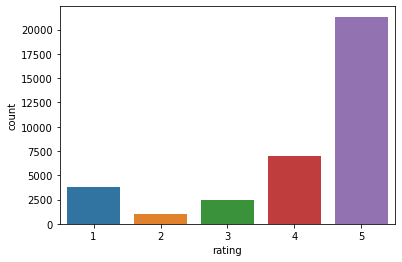

In [47]:
sns.countplot(df['rating'])

In [48]:
# sample of text data of comment
df['review_comments'][10]

"Very Good Thanks again Flipkart team the wonderful delivery on time. Kind delivery boy.\nThis product purchased for my Mom 😍 and she is very happy gifted to mom on her birthday 🎉\nShe is so happy!\nAmazing product from realme\n\na. Awesome built quality\nb. Best Battery 🔋 little bit heavy but, it's fine to handle afterall it has 6000 mh battery 🔋\nc. Camera is good 🤳 front and back both. It will be better maybe after some updates.\nd. Display is also good\n\nThanks again!"

In [49]:
df['review_comments'][2]

'Terrific purchase Camera 4/5 if u able to set it properly\nBattery 5/5 very Good with great charging speed.\nDisplay 4/5 its not full hd but HD + with very good brightness and contrast\nPerformance is too good 5/5\n\nValue for Money\nSelfie and back camera capture are given below in low light photography in night time....\nTotal 4.5 out of 5 in my vision\nHope for best'

In [50]:
# add lenth column of text data 
df['review_length']=df['review_comments'].str.len()

In [51]:
df

,review_comments,rating,review_length
0,Very Good Thanks again Flipkart team the wonde...,4,466
1,Terrific Very nice mobile and battry is very e...,5,157
2,Terrific purchase Camera 4/5 if u able to set ...,5,363
3,Good choice Positive sides :\n1. Battery is ve...,4,522
4,Fantastic Excellent!!\nVery good mobile. I ord...,5,239
...,...,...,...
35536,More Range - More connected devices This route...,5,561
35537,Faulty Product Product is ok. Brought the cost...,1,394
35538,Does what a basic router should do but for hig...,5,1242
35539,Mostly router decreases speed from 50Mbps to 5...,1,887


### Text preprocessing

In [52]:
# import nltk libraries
import nltk
from nltk.corpus import stopwords # for  stop words
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.tokenize import word_tokenize # for word tokenize
from nltk import pos_tag # for part of speech

In [53]:
# remove head and tail and white spaces puctuation, webaddress
df['review_comments']=df['review_comments'].str.replace(r'^\s+',' ')
df['review_comments']=df['review_comments'].str.replace(r'^\s+|\s+?',' ')
df['review_comments']=df['review_comments'].str.replace(r'http\S+',' ')
df['review_comments']=df['review_comments'].str.replace(r'[^\w\s]','')


In [54]:
#df['review_comments']=df['review_comments'].str.replace(r'[\s*\d{1}]',' ')
# replace number with numbr
#df['review_comments']=df['review_comments'].str.replace(r'\d+(\.\d+)?','numbr')

In [55]:
df['review_comments'][2]

'Terrific purchase Camera 45 if u able to set it properly Battery 55 very Good with great charging speed Display 45 its not full hd but HD  with very good brightness and contrast Performance is too good 55  Value for Money Selfie and back camera capture are given below in low light photography in night time Total 45 out of 5 in my vision Hope for best'

In [56]:
lemma=WordNetLemmatizer() # lemmatization use
stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','urs']) # stop words use

In [57]:
 # text cleaning function
def cleantext(text):
    text=str(text).lower()  # lower the cases
    spl_char=re.sub(r'[^a-zA-Z0-9]',' ',text) # remove punctuation
    text = re.sub("(<.*?>)", "",spl_char)  #remove html markup
    text = re.sub("(\\W)", " ", text)  #remove non-ascii and digits
    text = re.sub("(\\d)", "", text)
    token=nltk.word_tokenize(text)   # word tokenization
    words=[word for word in token if word not in stop_words ] # remove stop words
    tag_list=pos_tag(words,tagset=None) # part of speech use
    clean_text=[]
    for token,pos_token in tag_list:
        if pos_token.startswith('V'): #verb
            pos_val='v'
        elif pos_token.startswith('J'):# adjectove
            pos_val='a'
        elif pos_token.startswith('R'): #adverb 
            pos_val='r'
        else:
            pos_val='n' #noun
        lema_words=lemma.lemmatize(token,pos_val)
        clean_text.append(lema_words)
        
    return " ".join(clean_text)   

In [58]:
# apply created function 
df['clean_review_comments']=df['review_comments'].apply(cleantext)

In [59]:
# chcek clean text data length
df['clean_text_length']=df['clean_review_comments'].str.len()

In [60]:
df

,review_comments,rating,review_length,clean_review_comments,clean_text_length
0,Very Good Thanks again Flipkart team the wonde...,4,466,good thanks flipkart team wonderful delivery t...,296
1,Terrific Very nice mobile and battry is very e...,5,157,terrific nice mobile battry extra powar camera...,103
2,Terrific purchase Camera 45 if u able to set i...,5,363,terrific purchase camera able set properly bat...,235
3,Good choice Positive sides 1 Battery is very ...,4,522,good choice positive side battery powerful cer...,355
4,Fantastic Excellent Very good mobile I ordered...,5,239,fantastic excellent good mobile order friend h...,158
...,...,...,...,...,...
35536,More Range More connected devices This router...,5,561,range connect device router literally strip ve...,345
35537,Faulty Product Product is ok Brought the costl...,1,394,faulty product product ok bring costly one thi...,268
35538,Does what a basic router should do but for hig...,5,1242,basic router highend requirement go another ro...,784
35539,Mostly router decreases speed from 50Mbps to 5...,1,887,mostly router decrease speed mbps mb usage als...,562


In [61]:
# sample of clean text data
df['clean_review_comments'][2]

'terrific purchase camera able set properly battery good great charge speed display full hd hd good brightness contrast performance good value money selfie back camera capture give low light photography night time total vision hope best'

In [62]:
df['clean_review_comments'][10]

'good thanks flipkart team wonderful delivery time kind delivery boy product purchase mom happy gift mom birthday happy amazing product realme awesome build quality b best battery little bit heavy fine handle afterall mh battery c camera good front back well maybe updates display also good thanks'

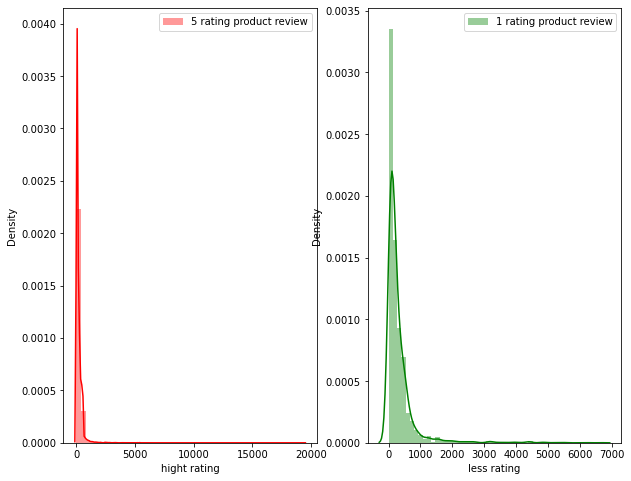

In [63]:
# Origional text distribution
f,ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(df[df['rating']==5]['review_length'],ax=ax[0],label=['5 rating product review'],color='r')
ax[0].set_xlabel('hight rating')
ax[0].legend()

sns.distplot(df[df['rating']==1]['review_length'],ax=ax[1],label=['1 rating product review'],color='g')
ax[1].set_xlabel('less rating')
ax[1].legend()

In [64]:
from nltk import FreqDist
# top frequently used words
def freq_words(x, terms = 10):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    return 

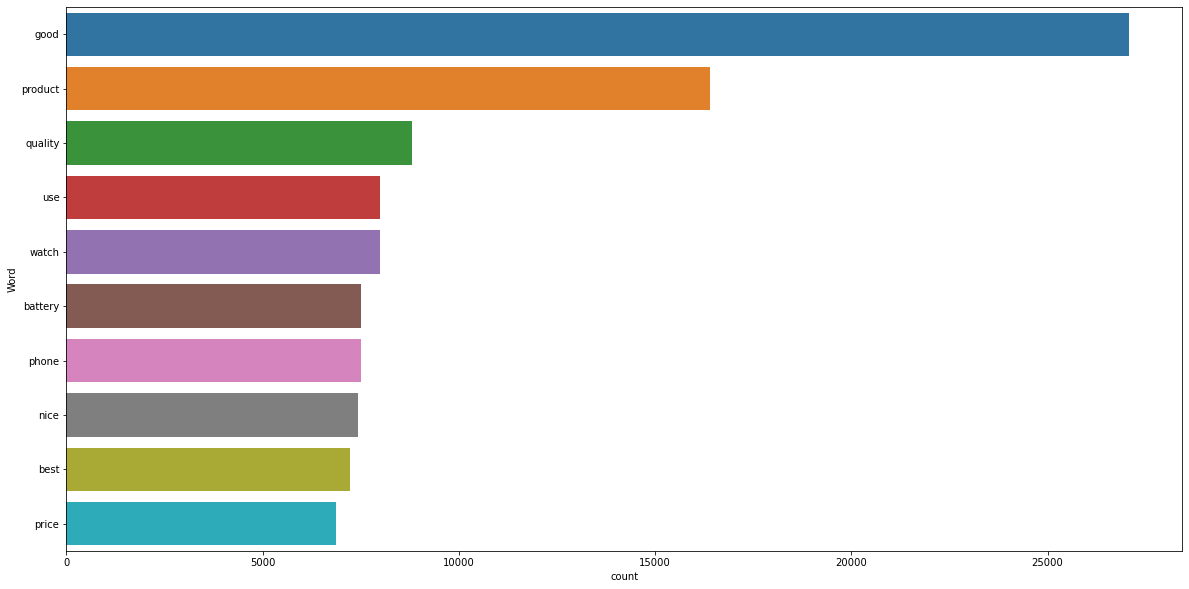

In [65]:
freq_words(df['clean_review_comments'])

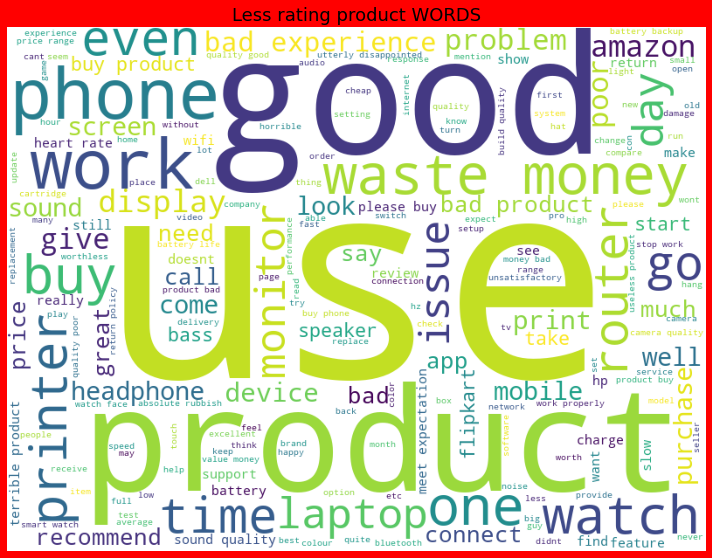

In [66]:
# generate wordcloud of abuse comments
from wordcloud import WordCloud

review=df['clean_review_comments'][df['rating']==1]
review_cloud=WordCloud(width=800,height=600,background_color='white',).generate(' '.join(review))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(review_cloud)
plt.title('Less rating product WORDS',fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

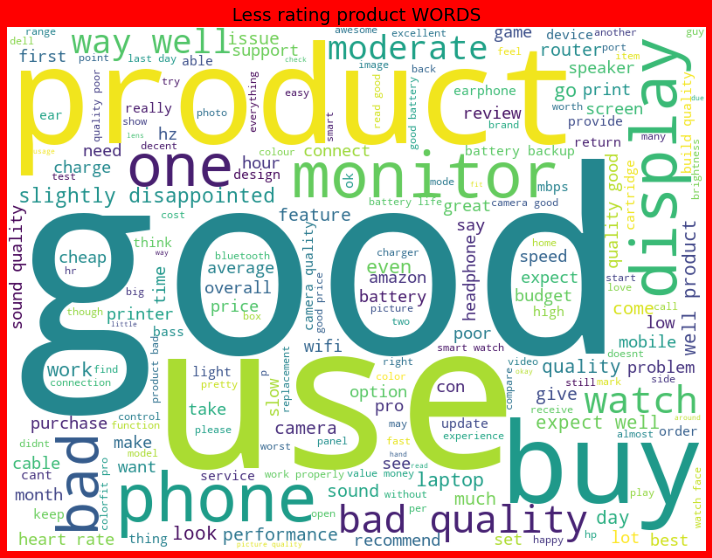

In [67]:
# generate wordcloud of abuse comments
from wordcloud import WordCloud

review=df['clean_review_comments'][df['rating']==2]
review_cloud=WordCloud(width=800,height=600,background_color='white',).generate(' '.join(review))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(review_cloud)
plt.title('Less rating product WORDS',fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

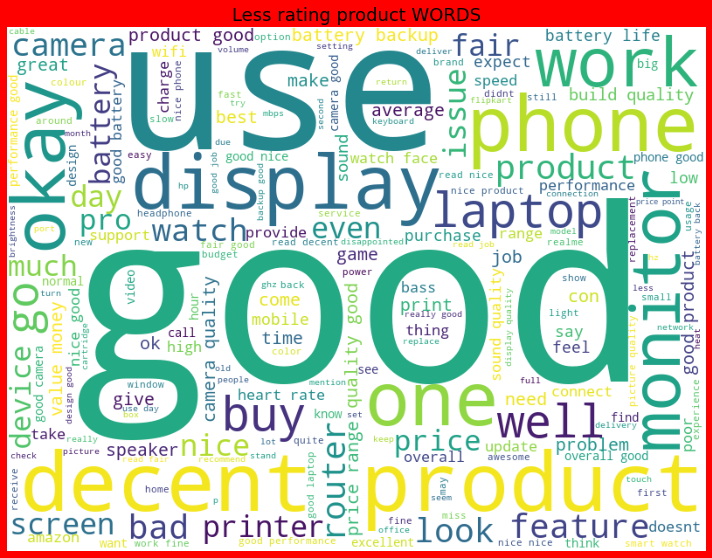

In [68]:
# generate wordcloud of abuse comments
from wordcloud import WordCloud

review=df['clean_review_comments'][df['rating']==3]
review_cloud=WordCloud(width=800,height=600,background_color='white',).generate(' '.join(review))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(review_cloud)
plt.title('Less rating product WORDS',fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

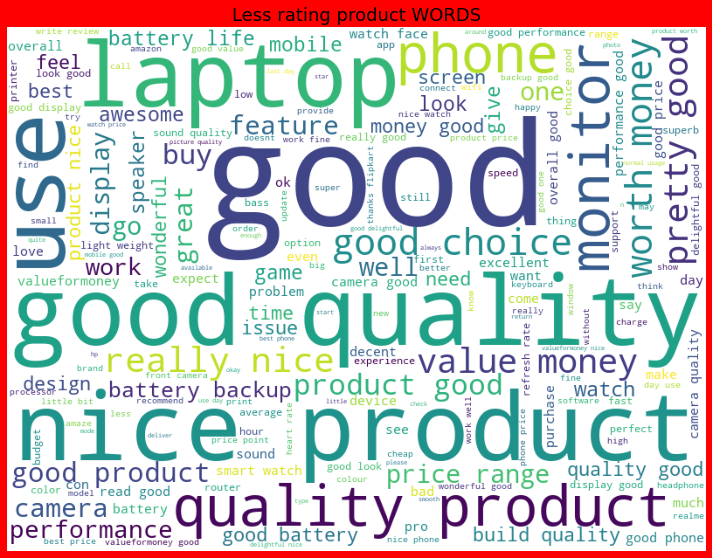

In [69]:
# generate wordcloud of abuse comments
from wordcloud import WordCloud

review=df['clean_review_comments'][df['rating']==4]
review_cloud=WordCloud(width=800,height=600,background_color='white',).generate(' '.join(review))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(review_cloud)
plt.title('Less rating product WORDS',fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

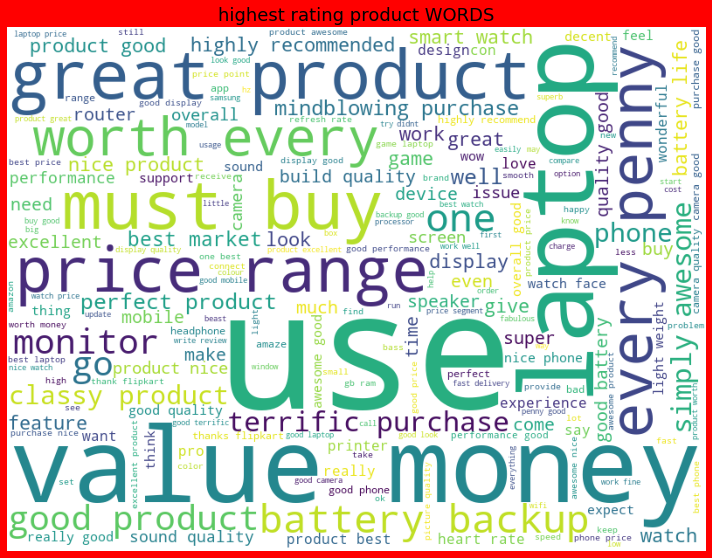

In [70]:
# generate wordcloud of abuse comments
from wordcloud import WordCloud

review1=df['clean_review_comments'][df['rating']==5]
review_cloud1=WordCloud(width=800,height=600,background_color='white').generate(' '.join(review1))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(review_cloud1)
plt.title('highest rating product WORDS',fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

In [71]:
# import feature extraction library
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
# convert words to numerical features
tfidf=TfidfVectorizer(analyzer='word')
x_train=tfidf.fit_transform(df['clean_review_comments'])

In [73]:
tfidf.vocabulary_

{'good': 6891,
 'thanks': 16400,
 'flipkart': 6216,
 'team': 16268,
 'wonderful': 18377,
 'delivery': 4146,
 'time': 16651,
 'kind': 8873,
 'boy': 2105,
 'product': 12841,
 'purchase': 13143,
 'mom': 10344,
 'happy': 7316,
 'gift': 6795,
 'birthday': 1852,
 'amazing': 565,
 'realme': 13541,
 'awesome': 1248,
 'build': 2305,
 'quality': 13242,
 'best': 1711,
 'battery': 1500,
 'little': 9423,
 'bit': 1855,
 'heavy': 7502,
 'fine': 6065,
 'handle': 7278,
 'afterall': 323,
 'mh': 10052,
 'camera': 2488,
 'front': 6454,
 'back': 1331,
 'well': 18142,
 'maybe': 9872,
 'updates': 17332,
 'display': 4550,
 'also': 509,
 'terrific': 16359,
 'nice': 10846,
 'mobile': 10259,
 'battry': 1537,
 'extra': 5698,
 'powar': 12475,
 'price': 12631,
 'range': 13409,
 'honest': 7708,
 'rating': 13475,
 'able': 39,
 'set': 14752,
 'properly': 13010,
 'great': 7091,
 'charge': 2757,
 'speed': 15495,
 'full': 6496,
 'hd': 7393,
 'brightness': 2182,
 'contrast': 3475,
 'performance': 11992,
 'value': 17572,
 

In [74]:
y=df['rating']

In [75]:
x_train.shape,y.shape

((35470, 18763), (35470,))

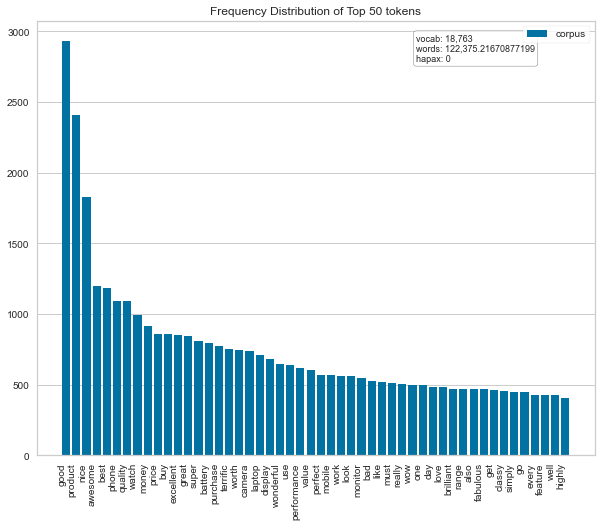

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [131]:
# use for top most frequent words use in features
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(10,8))
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(x_train)
plt.legend(loc='lower right')
visualizer.show()

In [76]:
# import metrics,ml libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score,auc,hamming_loss

In [77]:
# spliting train test data
train_x,test_x,train_y,test_y=train_test_split(x_train,y,test_size=0.2,random_state=1,)

In [78]:
train_x.shape,test_x.shape

((28376, 18763), (7094, 18763))

### naive bayes classifier

In [79]:
# Naive bayes Multinomial
naive=MultinomialNB()
naive.fit(train_x,train_y)
y_pred_nv=naive.predict(test_x)
print('train score =>\t',naive.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_nv)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_nv,average='micro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_nv))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_nv))
print('Classification report =>\n',classification_report(test_y,y_pred_nv,))

train score =>	 70.08739780095856
accuracy score =>	 68.39582745982521
f1 score =>	 68.39582745982521
hamming loss naive ==> 0.31604172540174796
confusion matrix ==>
 [[ 330    1    0    1  446]
 [   9    0    0    5  190]
 [   5    0   33    3  439]
 [   9    0    1  272 1106]
 [  22    0    0    5 4217]]
Classification report =>
               precision    recall  f1-score   support

           1       0.88      0.42      0.57       778
           2       0.00      0.00      0.00       204
           3       0.97      0.07      0.13       480
           4       0.95      0.20      0.32      1388
           5       0.66      0.99      0.79      4244

    accuracy                           0.68      7094
   macro avg       0.69      0.34      0.36      7094
weighted avg       0.74      0.68      0.61      7094



### logistic regressor

In [80]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(train_x,train_y)
y_pred_lg=lg.predict(test_x)
print('train score =>\t',lg.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_lg)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_lg,average='micro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_lg))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_lg))
print('Classification report =>\n',classification_report(test_y,y_pred_lg,))

train score =>	 89.37482379475613
accuracy score =>	 85.22695235410205
f1 score =>	 85.22695235410205
hamming loss naive ==> 0.1477304764589794
confusion matrix ==>
 [[ 609    1    8   31  129]
 [  19  113    5   21   46]
 [  20    3  291   64  102]
 [  37    1   15 1005  330]
 [  70    3   13  130 4028]]
Classification report =>
               precision    recall  f1-score   support

           1       0.81      0.78      0.79       778
           2       0.93      0.55      0.70       204
           3       0.88      0.61      0.72       480
           4       0.80      0.72      0.76      1388
           5       0.87      0.95      0.91      4244

    accuracy                           0.85      7094
   macro avg       0.86      0.72      0.78      7094
weighted avg       0.85      0.85      0.85      7094



### KNeighbors classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='auto',n_jobs=-1,p=2)
knn.fit(train_x,train_y)
y_pred_knn=knn.predict(test_x)
print('train score =>\t',knn.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_knn)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_knn,average='micro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_knn))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_knn))
print('Classification report =>\n',classification_report(test_y,y_pred_knn,))

train score =>	 99.51367352692417
accuracy score =>	 86.87623343670707
f1 score =>	 86.87623343670707
hamming loss naive ==> 0.13123766563292924
confusion matrix ==>
 [[ 655    2   12   13   96]
 [  33  135    2    9   25]
 [  53    5  348   25   49]
 [ 101    4   18 1066  199]
 [ 168    3   17   97 3959]]
Classification report =>
               precision    recall  f1-score   support

           1       0.65      0.84      0.73       778
           2       0.91      0.66      0.76       204
           3       0.88      0.72      0.79       480
           4       0.88      0.77      0.82      1388
           5       0.91      0.93      0.92      4244

    accuracy                           0.87      7094
   macro avg       0.85      0.79      0.81      7094
weighted avg       0.88      0.87      0.87      7094



## SGD Classifier

In [84]:
from sklearn.linear_model import SGDClassifier

In [85]:
sgd=SGDClassifier()
sgd.fit(train_x,train_y)
y_pred_sgd=sgd.predict(test_x)
print('train score =>\t',sgd.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_sgd)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_sgd,average='micro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_sgd))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_sgd))
print('Classification report =>\n',classification_report(test_y,y_pred_sgd,))

train score =>	 88.67352692416127
accuracy score =>	 84.64899915421483
f1 score =>	 84.64899915421483
hamming loss naive ==> 0.1535100084578517
confusion matrix ==>
 [[ 608    4   10   28  128]
 [  23  115    3   23   40]
 [  25    3  275   64  113]
 [  39    1   16  949  383]
 [  69    7   14   96 4058]]
Classification report =>
               precision    recall  f1-score   support

           1       0.80      0.78      0.79       778
           2       0.88      0.56      0.69       204
           3       0.86      0.57      0.69       480
           4       0.82      0.68      0.74      1388
           5       0.86      0.96      0.91      4244

    accuracy                           0.85      7094
   macro avg       0.84      0.71      0.76      7094
weighted avg       0.85      0.85      0.84      7094



In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

### Decision Tree Classifier

In [132]:
# Decision tree classifier
dtc= DecisionTreeClassifier()
dtc.fit(train_x,train_y)
y_pred_dtc= dtc.predict(test_x)
print('train score =>\t',dtc.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_dtc)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_dtc,average='micro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_dtc))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_dtc))
print('Classification report =>\n',classification_report(test_y,y_pred_dtc,))

train score =>	 99.51367352692417
accuracy score =>	 87.29912602199042
f1 score =>	 87.29912602199042
hamming loss naive ==> 0.12700873978009586
confusion matrix ==>
 [[ 602   18   23   25  110]
 [  16  145    9    4   30]
 [  15    3  361   25   76]
 [  31    9   26 1126  196]
 [ 105   20   41  119 3959]]
Classification report =>
               precision    recall  f1-score   support

           1       0.78      0.77      0.78       778
           2       0.74      0.71      0.73       204
           3       0.78      0.75      0.77       480
           4       0.87      0.81      0.84      1388
           5       0.91      0.93      0.92      4244

    accuracy                           0.87      7094
   macro avg       0.82      0.80      0.81      7094
weighted avg       0.87      0.87      0.87      7094



### Random forest classifier

In [100]:
# select best n_estimators
def get_maxscore(n_estimators, train_x, test_x, train_y, test_y):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    acuu_score = accuracy_score(test_y, preds_val)
    return(acuu_score)

In [101]:
estimators = [50,100,500,700]
#Write loop to find the ideal estimator size from estimators
for i in estimators:
    accur=get_maxscore(i,train_x,test_x,train_y,test_y)
    print("n estimators: %d  \t\t hamming loss:  %f" %(i,accur))

n estimators: 50  		 hamming loss:  0.889202
n estimators: 100  		 hamming loss:  0.893008
n estimators: 500  		 hamming loss:  0.892444
n estimators: 700  		 hamming loss:  0.891458


In [104]:
rf=RandomForestClassifier(random_state=1,n_jobs=-1,n_estimators=100)
rf.fit(train_x,train_y)
y_pred_rf=rf.predict(test_x)
print('train score =>\t',rf.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_rf)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_rf,average='macro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_rf))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_rf))
print('Classification report =>\n',classification_report(test_y,y_pred_rf,))

train score =>	 99.51367352692417
accuracy score =>	 89.30081759233155
f1 score =>	 84.14112067180814
hamming loss naive ==> 0.10699182407668452
confusion matrix ==>
 [[ 612    2    5    3  156]
 [   9  136    0    2   57]
 [  18    1  343   18  100]
 [  26    1    5 1089  267]
 [  47    3    8   31 4155]]
Classification report =>
               precision    recall  f1-score   support

           1       0.86      0.79      0.82       778
           2       0.95      0.67      0.78       204
           3       0.95      0.71      0.82       480
           4       0.95      0.78      0.86      1388
           5       0.88      0.98      0.93      4244

    accuracy                           0.89      7094
   macro avg       0.92      0.79      0.84      7094
weighted avg       0.90      0.89      0.89      7094



### XGBoost classifier

In [105]:
from xgboost import XGBClassifier

In [111]:
def get_maxscore(n_estimators, train_x, test_x, train_y, test_y):
    model = XGBClassifier(n_estimators=n_estimators, random_state=1,disable_default_eval_metric=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    acuu_score = accuracy_score(test_y, preds_val)
    return(acuu_score)
estimators = [50,100,500,700,1000]
#Write loop to find the ideal estimator size from estimators
for i in estimators:
    accur=get_maxscore(i,train_x,test_x,train_y,test_y)
    print("n estimators: %d  \t\t accuracy score:  %f" %(i,accur))

n estimators: 50  		 accuracy score:  0.875952
n estimators: 100  		 accuracy score:  0.890048
n estimators: 500  		 accuracy score:  0.898506
n estimators: 700  		 accuracy score:  0.899774
n estimators: 1000  		 accuracy score:  0.900197


In [114]:
def get_maxscore(learning_rate, train_x, test_x, train_y, test_y):
    model = XGBClassifier(learning_rate=learning_rate, random_state=1,disable_default_eval_metric=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    acuu_score = accuracy_score(test_y, preds_val)
    return(acuu_score)
learning = [0.001,0.01,0.1,1]
#Write loop to find the ideal estimator size from estimators
for i in learning:
    accur=get_maxscore(i,train_x,test_x,train_y,test_y)
    print("learning rate: %f  \t\t accuracy score:  %f" %(i,accur))

learning rate: 0.001000  		 accuracy score:  0.750634
learning rate: 0.010000  		 accuracy score:  0.767832
learning rate: 0.100000  		 accuracy score:  0.859318
learning rate: 1.000000  		 accuracy score:  0.896532


In [116]:
xg=XGBClassifier(disable_default_eval_metric=1,n_estimators=1000,learning_rate=1,n_jobs=-1)
xg.fit(train_x,train_y)
y_pred_xg=xg.predict(test_x)
print('train score =>\t',xg.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_xg)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_xg,average='macro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_xg))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_xg))
print('Classification report =>\n',classification_report(test_y,y_pred_xg,))

train score =>	 99.5101494220468
accuracy score =>	 89.78009585565266
f1 score =>	 84.96816073754431
hamming loss naive ==> 0.10219904144347336
confusion matrix ==>
 [[ 640    3   13   20  102]
 [  11  144    4   12   33]
 [  20    2  382   30   46]
 [  29    5   11 1149  194]
 [  78    5   16   91 4054]]
Classification report =>
               precision    recall  f1-score   support

           1       0.82      0.82      0.82       778
           2       0.91      0.71      0.79       204
           3       0.90      0.80      0.84       480
           4       0.88      0.83      0.85      1388
           5       0.92      0.96      0.93      4244

    accuracy                           0.90      7094
   macro avg       0.88      0.82      0.85      7094
weighted avg       0.90      0.90      0.90      7094



### Adaboost classifier

In [122]:
# best estimators
def get_maxscore(n_estimators, train_x, test_x, train_y, test_y):
    model =AdaBoostClassifier(n_estimators=n_estimators, random_state=1,)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    acuu_score = accuracy_score(test_y, preds_val)
    return(acuu_score)
estimators = [50,100,500,700,1000]
#Write loop to find the ideal estimator size from estimators
for i in estimators:
    accur=get_maxscore(i,train_x,test_x,train_y,test_y)
    print("n estimators: %d  \t\t accuracy score:  %f" %(i,accur))

n estimators: 50  		 accuracy score:  0.792219
n estimators: 100  		 accuracy score:  0.809698
n estimators: 500  		 accuracy score:  0.796730
n estimators: 700  		 accuracy score:  0.791655
n estimators: 1000  		 accuracy score:  0.771638


In [123]:
# get best learning rate
def get_maxscore(learning_rate, train_x, test_x, train_y, test_y):
    model = AdaBoostClassifier(learning_rate=learning_rate, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    acuu_score = accuracy_score(test_y, preds_val)
    return(acuu_score)
learning = [0.001,0.01,0.1,1]
#Write loop to find the ideal estimator size from estimators
for i in learning:
    accur=get_maxscore(i,train_x,test_x,train_y,test_y)
    print("learning rate: %f  \t\t accuracy score:  %f" %(i,accur))

learning rate: 0.001000  		 accuracy score:  0.617987
learning rate: 0.010000  		 accuracy score:  0.603891
learning rate: 0.100000  		 accuracy score:  0.604314
learning rate: 1.000000  		 accuracy score:  0.792219


In [124]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1,algorithm='SAMME.R',random_state=1)
ada.fit(train_x,train_y)
y_pred_ada=ada.predict(test_x)
print('train score =>\t',ada.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_ada)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_ada,average='macro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_ada))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_ada))
print('Classification report =>\n',classification_report(test_y,y_pred_ada,))

train score =>	 81.66055821821257
accuracy score =>	 80.96983366224978
f1 score =>	 70.63586143356082
hamming loss naive ==> 0.19030166337750212
confusion matrix ==>
 [[ 619   15   10   39   95]
 [  32  101    8   26   37]
 [  29    5  248  110   88]
 [  58    2   37  999  292]
 [ 130   18   34  285 3777]]
Classification report =>
               precision    recall  f1-score   support

           1       0.71      0.80      0.75       778
           2       0.72      0.50      0.59       204
           3       0.74      0.52      0.61       480
           4       0.68      0.72      0.70      1388
           5       0.88      0.89      0.89      4244

    accuracy                           0.81      7094
   macro avg       0.75      0.68      0.71      7094
weighted avg       0.81      0.81      0.81      7094



### Bagging Classifier

In [148]:
bg=BaggingClassifier(n_estimators=500,n_jobs=-1,random_state=1)
bg.fit(train_x,train_y)
y_pred_bg=bg.predict(test_x)
print('train score =>\t',bg.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_bg)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_bg,average='macro')*100)
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_bg))
print('confusion matrix ==>\n',confusion_matrix(test_y,y_pred_bg))
print('Classification report =>\n',classification_report(test_y,y_pred_bg,))

train score =>	 99.51367352692417
accuracy score =>	 89.1598533972371
f1 score =>	 84.11882128233319
hamming loss naive ==> 0.10840146602762898
confusion matrix ==>
 [[ 612    7    4   13  142]
 [  10  142    2    3   47]
 [  25    2  364   16   73]
 [  30    0   11 1121  226]
 [  68    6   17   67 4086]]
Classification report =>
               precision    recall  f1-score   support

           1       0.82      0.79      0.80       778
           2       0.90      0.70      0.79       204
           3       0.91      0.76      0.83       480
           4       0.92      0.81      0.86      1388
           5       0.89      0.96      0.93      4244

    accuracy                           0.89      7094
   macro avg       0.89      0.80      0.84      7094
weighted avg       0.89      0.89      0.89      7094



In [138]:
# Saving model
import pickle
pickle.dump(xg,open('review_comments.pkl','wb'))
xgb_model=pickle.load(open('review_comments.pkl','rb'))

In [145]:
#test the model
test=['product is very bad but processor is slow, camera quality is worst ']

In [146]:
# transform test comments into vectors
test_tf=tfidf.transform(test)

In [147]:
# Predict test data
predition=xgb_model.predict(test_tf)
predition

array([1])

In [149]:
test2=['laptops is looks nice but working processor slow and speaker volume is low ']

In [150]:
# transform test comments into vectors
test_tf1=tfidf.transform(test2)
# Predict test data
predition=xgb_model.predict(test_tf1)
predition

array([3])